# *GROUP 8 MINOR PROJECT **UNDER THE SUPERVISION OF** **DR. SUJATA SWAIN MAM**:*
1.   VIVEK PRASAD(22051909)
2.   SUMIT BARDOLAI(22051807)
3.   SWARUP BEHERA(22051812)
4.   TUSHAR SAHU(22051816)




<h1>Pneumonia detection using Convolutional neural networks by examining the chest xray images of human</h1>

We have used **RCLONE** and **RDB CLIENT** to upload the dataset to our Drive

Chest X-rays are used for detecting the Pneumonia infection and to locate the infected area in the lungs.
So, To detect the the pneumonia radiologist have to observe the chest xray and he/she has to update the doctor correctly.
The main objective of this model is to identify if the person has Pneumonia or not with high accuracy so that the person can get treatment as soon as possible. Deep Learning models which are trained correctly by using good datasets can be helpful for doctors.
To train the model for detecting whether the person has pneumonia or not, A Convolutional Neural Network(CNN) is used. The CNN can train the images of chest xrays and then it can predict with high accuracy.


The dataset used here is chest xray dataset which is preprocessed.
You can find the **Dataset** [here.](https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia)

The dataset consists of :


*   5216 training images of which 3875 are of Pneumonia and 1341 are normal images.
*   624 testing images of which 390 are of Pneumonia and 234 are normal.




**python libraries used :**

Numpy : Used for multidimensional arrays.

Matplotlib : Used to visualize data with graphs.

cv2 : OpenCV is used to deal with images.

Keras : It is the interface for Neural Networks and Tensorflow.

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization
import cv2
from keras.preprocessing.image import img_to_array
from tensorflow.keras.optimizers import Adam

The below mentioned google.colab import drive is used to import drive to colab and drive.mount is used to mount data which is present in drive, so that we can access it.

In [3]:
from google.colab import drive
drive.mount('/content/Drive')

Mounted at /content/Drive


**Creating the train data generator.**

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True)


In [5]:
import os
train_dir = "/content/Drive/MyDrive/chest_xray/val"
print(os.listdir(train_dir))

['NORMAL', 'PNEUMONIA']


**Training data which is present in drive.**

In [6]:
train_images = "/content/Drive/MyDrive/chest_xray/train"

Here every image is resized to (300,300)

In [7]:
train_generator = train_datagen.flow_from_directory(train_images,
    target_size = (300,300),
    batch_size =128,
    class_mode = 'binary'
    )

Found 5216 images belonging to 2 classes.


**Model outputs :**

0 : Normal condition

1 : Pneumonia condition

In [8]:
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [9]:
validation_images="/content/Drive/MyDrive/chest_xray/val"

**Validation data generator and loading validation data**

In [10]:
test_datagen = ImageDataGenerator(rescale = 1./255)
validation_generator = test_datagen.flow_from_directory(validation_images,
    target_size= (300,300),
    batch_size = 128,
    class_mode = 'binary')

Found 16 images belonging to 2 classes.


**Plotting :** Images with Pneumonia from dataset.

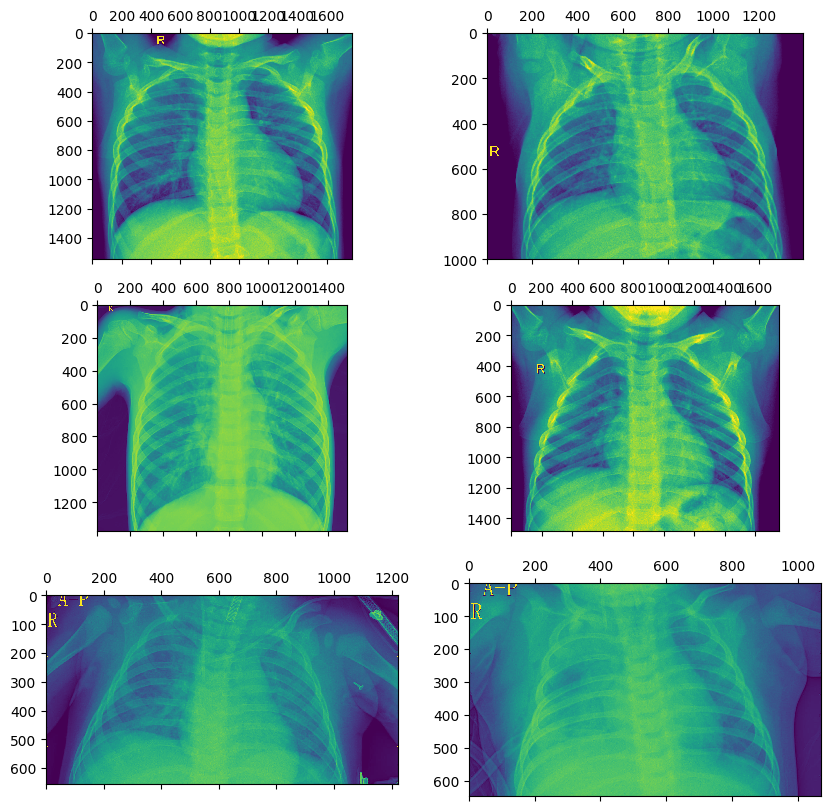

In [11]:
#Pneumonia
import matplotlib.pyplot as plt

plot_image = plt.figure(figsize=(10,10))
plot1 = plot_image.add_subplot(3,2,1)
plot2 = plot_image.add_subplot(3,2,2)
plot3 = plot_image.add_subplot(3,2,3)
plot4 = plot_image.add_subplot(3,2,4)
plot5 = plot_image.add_subplot(3,2,5)
plot6 = plot_image.add_subplot(3,2,6)
plot1.matshow(plt.imread(train_generator.filepaths[41]))
plot2.matshow(plt.imread(train_generator.filepaths[176]))
plot3.matshow(plt.imread(train_generator.filepaths[1553]))
plot4.matshow(plt.imread(train_generator.filepaths[354]))
plot5.matshow(plt.imread(train_generator.filepaths[2679]))
plot6.matshow(plt.imread(train_generator.filepaths[2710]))

**Plotting :** Images without Pneumonia from dataset.

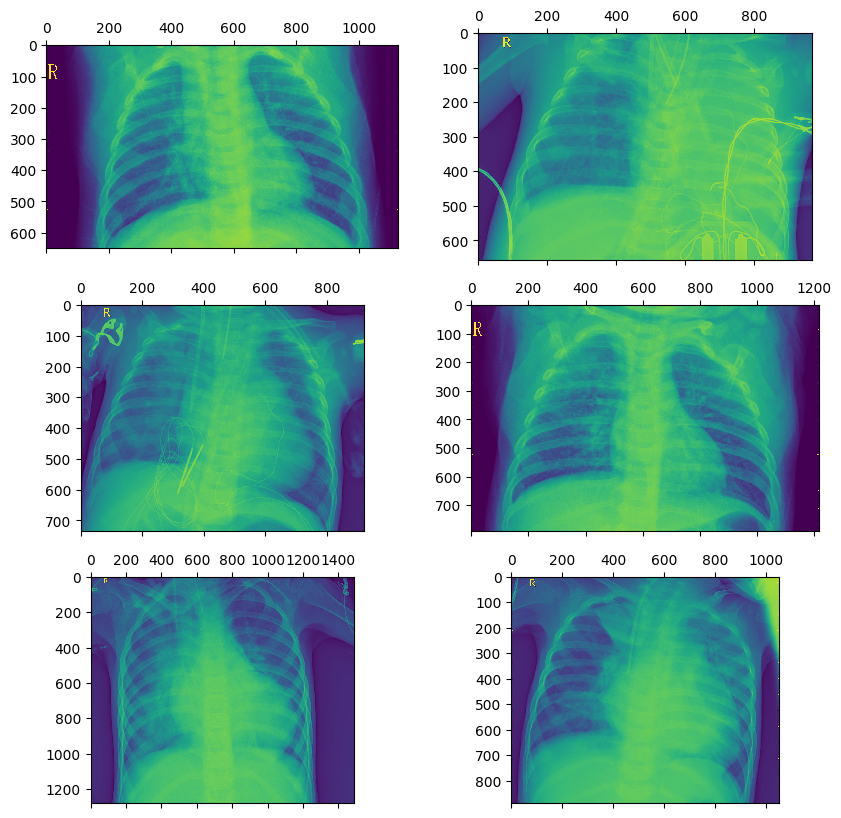

In [12]:
#Normal
plot_image = plt.figure(figsize=(10,10))

plot1 = plot_image.add_subplot(3,2,1)
plot2 = plot_image.add_subplot(3,2,2)
plot3 = plot_image.add_subplot(3,2,3)
plot4 = plot_image.add_subplot(3,2,4)
plot5 = plot_image.add_subplot(3,2,5)
plot6 = plot_image.add_subplot(3,2,6)
plot1.matshow(plt.imread(train_generator.filepaths[1419]))
plot2.matshow(plt.imread(train_generator.filepaths[1365]))
plot3.matshow(plt.imread(train_generator.filepaths[1400]))
plot4.matshow(plt.imread(train_generator.filepaths[1350]))
plot5.matshow(plt.imread(train_generator.filepaths[1345]))
plot6.matshow(plt.imread(train_generator.filepaths[1349]))

CNN consists of Convolutional layers, pooling layers.

ANN consists of hidden layers and output layers.



Then for classification Artificial Neural Network with 5 hidden layers and one output layer which has a single neuron is used.




**Activation function :**

ReLU is used in the hidden layers and Conv2D layers.

Sigmoid is used because the output we need is of binary classification.

**Loss function :** Binary cross entropy is used.

**Optimizer :** Adam optimizer is used because it gives best result.


<h1>Neural Networks using TensorFlow</h1>

Metrics : Accuracy.

In [13]:
model= tf.keras.models.Sequential([
                                   tf.keras.layers.Conv2D(16, (3,3), activation= 'relu', input_shape= (300, 300, 3)),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.Conv2D(32, (3,3), activation= 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.Conv2D(64, (3,3), activation= 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.Conv2D(128, (3,3), activation= 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.Conv2D(128, (3,3), activation= 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),

                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(256, activation= 'relu'),
                                   tf.keras.layers.Dense(512, activation= 'relu'),
                                   tf.keras.layers.Dense(1, activation= 'sigmoid')
])
model.summary()
model.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 298, 298, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 149, 149, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 147, 147, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 73, 73, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 71, 71, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 35, 35, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 33, 33, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 14, 14, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       1,605,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,983,009 (7.56 MB)

 Trainable params: 1,983,009 (7.56 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
from tensorflow.keras.optimizers import Adam

trained the model using 11 epocs

In [16]:
history = model.fit(train_generator, epochs = 10, validation_data = validation_generator)

Epoch 1/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 675s 16s/step - accuracy: 0.8862 - loss: 0.2614 - val_accuracy: 0.7500 - val_loss: 0.5835
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 678s 16s/step - accuracy: 0.9169 - loss: 0.2073 - val_accuracy: 0.6250 - val_loss: 0.9809
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 685s 17s/step - accuracy: 0.9270 - loss: 0.1850 - val_accuracy: 0.8750 - val_loss: 0.4479
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 672s 16s/step - accuracy: 0.9335 - loss: 0.1695 - val_accuracy: 0.6875 - val_loss: 0.7318
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 672s 16s/step - accuracy: 0.9367 - loss: 0.1686 - val_accuracy: 0.5625 - val_loss: 0.7153
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 685s 16s/step - accuracy: 0.9410 - loss: 0.1542 - val_accuracy: 0.6250 - val_loss: 0.8858
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 683s 17s/step - accuracy: 0.9524 - loss: 0.1302 - val_accuracy: 0.8125 - val_loss: 0.4538
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 674s 16s/step - accuracy: 0.9391 - loss: 0.1490 - val_accuracy: 0.

after training the model Accuracy:0.9270 and val_accuracy:0.8750

In [17]:
loss = history.history['loss']
val_loss = history.history['val_loss']

**<h3>Plotting Loss Vs Num. of Epochs</h3>**

Loss Vs Num. of Epochs
Training Loss : 0.3982 
Value loss : 0.7206


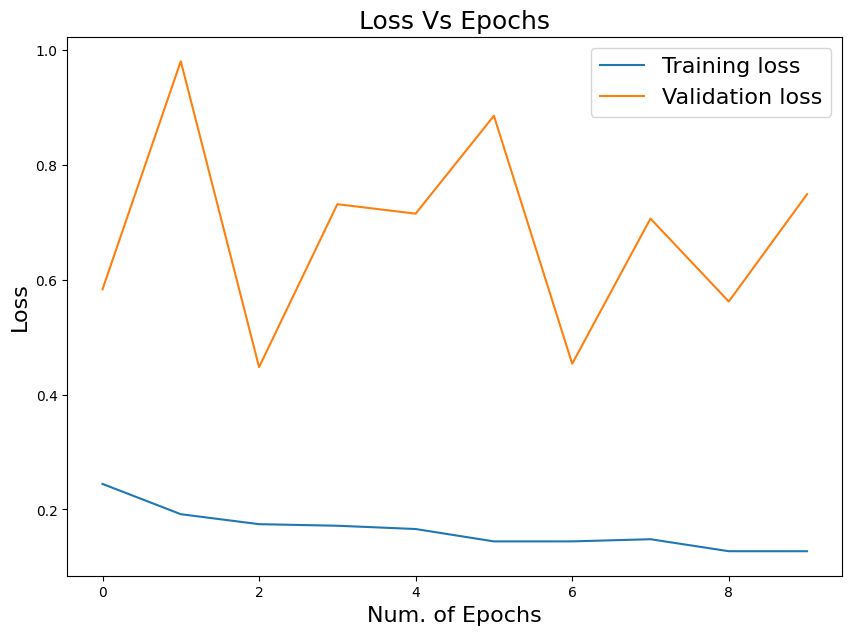

In [18]:
plt.figure(figsize=(10, 7))
plt.plot(loss)
plt.plot(val_loss)
plt.legend(['Training loss','Validation loss'], fontsize=16)
plt.title("Loss Vs Epochs", fontsize=18)
plt.xlabel("Num. of Epochs", fontsize=16)
plt.ylabel("Loss", fontsize=16)
print("Loss Vs Num. of Epochs")
print("Training Loss : 0.3982","\nValue loss : 0.7206")
plt.show()

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

**<h3>Plotting Accuracy Vs Num. of Epochs</h3>**

Accuracy Vs Epochs
Training accuracy : 0.8232 
Value accuracy :0.8125 


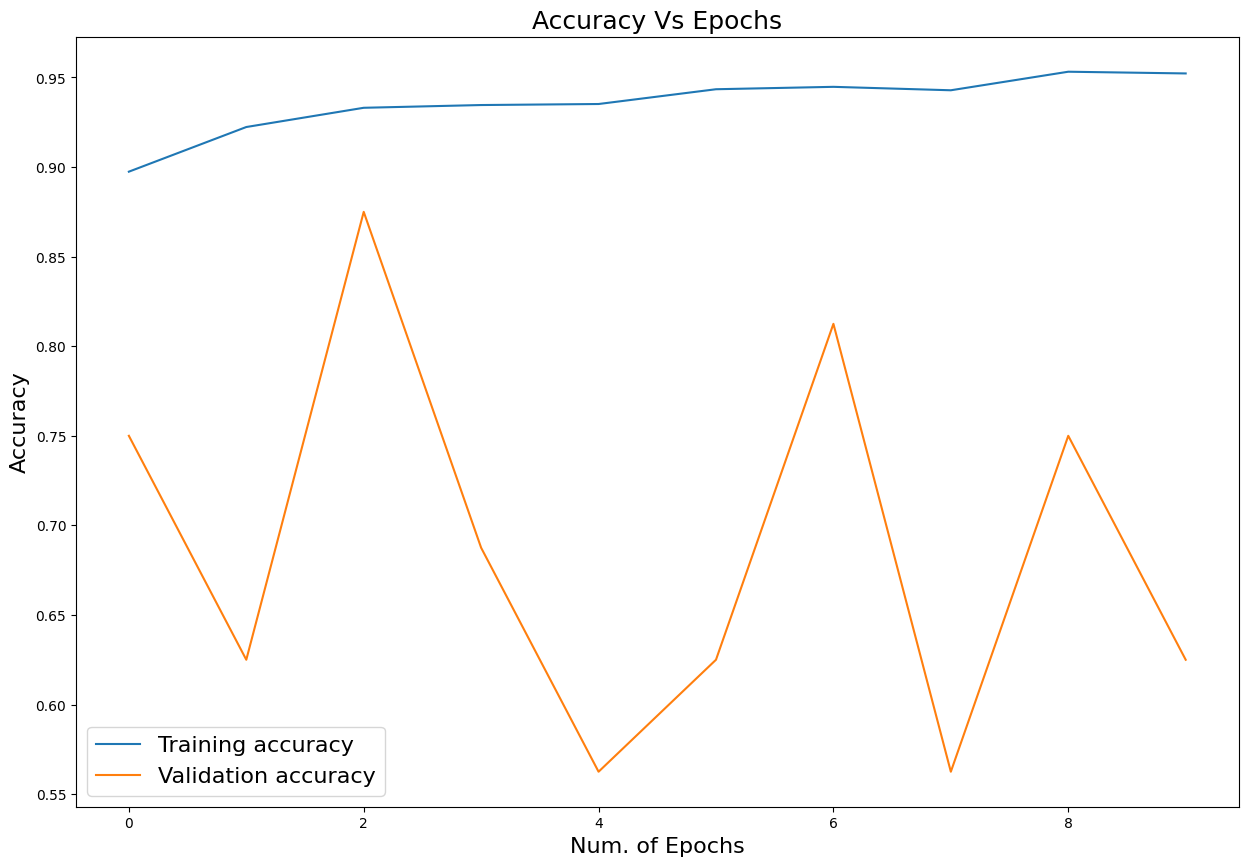

In [20]:
plt.figure(figsize=(15, 10))
plt.plot(acc)
plt.plot(val_acc)
plt.legend(['Training accuracy','Validation accuracy'], fontsize=16)
plt.title("Accuracy Vs Epochs", fontsize=18)
plt.xlabel("Num. of Epochs", fontsize=16)
plt.ylabel("Accuracy", fontsize=16)
print("Accuracy Vs Epochs")
print("Training accuracy : 0.8232","\nValue accuracy :0.8125 ")
plt.show()

<h3>Saving the model</h3>

In [21]:
model.save("trained.h5")

<h3>Loading the saved model so that we can load the model which is already saved so lot of time can be saved and it can also be used for deployment.</h3>

In [22]:
from keras.models import load_model
model = load_model("trained.h5")

**Loading the test data generator from drive**

In [23]:
test_images="/content/drive/MyDrive/chest_xray/test"

In [25]:
!pip install keras # Install keras only once
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the trained model
model = load_model("trained.h5")  # Load the model only once

# Set the path to the test images directory
test_images = "/content/drive/MyDrive/chest_xray/test"

# Create an ImageDataGenerator for preprocessing
eval_datagen = ImageDataGenerator(rescale=1. / 255)

# Create a test generator using flow_from_directory
test_generator = eval_datagen.flow_from_directory(
    test_images,
    target_size=(300, 300),
    batch_size=128,
    class_mode='binary',
      # Important to set shuffle to False for evaluation
)

# Evaluate the model using the test generator
eval_result = model.evaluate(test_generator)
print('loss:', eval_result[0])
print('accuracy:', eval_result[1])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 624 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 100s 19s/step - accuracy: 0.8876 - loss: 0.3145
loss: 0.3198845088481903
accuracy: 0.8862179517745972


The accuracy of test data is : <h3>88.62%</h3>

**An image is used from drive for prediction**

In [26]:
import cv2
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the image, ensuring the correct path after mounting Google Drive
img = cv2.imread('/content/drive/MyDrive/chest_xray/test/NORMAL/IM-0017-0001.jpeg')

# Check if the image was loaded successfully
if img is None:
    print("Error: Image could not be loaded. Check file path and permissions.")
else:
    tempimg = img
    img = cv2.resize(img, (300, 300))
    img = img / 255.0
    img = img.reshape(1, 300, 300, 3)
    model.predict(img)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
Prediction: Normal


Text(0.5, 1.0, 'Prediction: Normal')

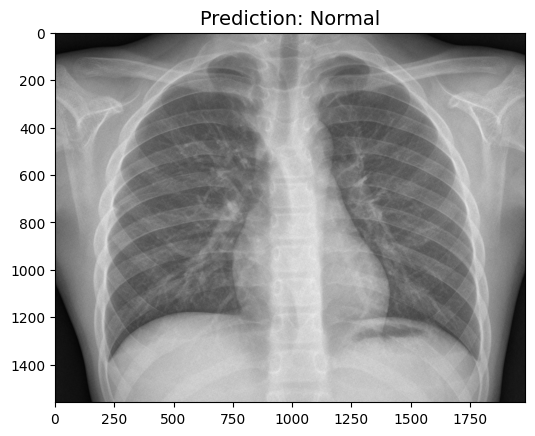

In [27]:
prediction = model.predict(img) >= 0.5
if prediction>=0.5:
  prediction = "Pneumonia"
else:
  prediction = "Normal"
print("Prediction: "+prediction)
plt.imshow(tempimg)
plt.title("Prediction: "+prediction, fontsize=14)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
[[0.9994333]]


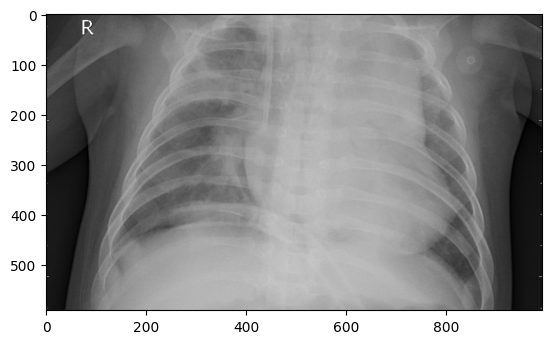

In [28]:
img= cv2.imread('/content/drive/MyDrive/chest_xray/test/PNEUMONIA/person104_bacteria_492.jpeg')
tempimg = img
img = cv2.resize(img,(300,300))
img = img/255.0
img = img.reshape(1,300,300,3)
model.predict(img)
plt.imshow(tempimg)
print(model.predict(img))

Here another image is used and the model predicted it as **0.99** which is greater than 0.5.

so it have be Pneumonia image which is predicted below.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Prediction: Pneumonia


Text(0.5, 1.0, 'Prediction: Pneumonia')

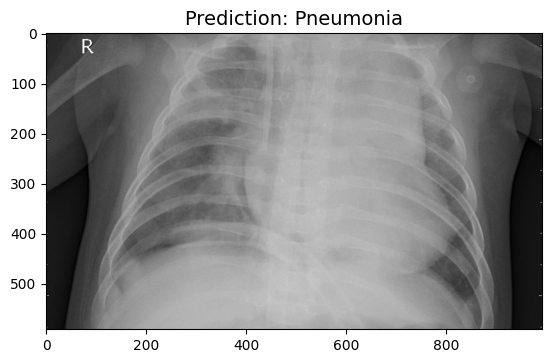

In [29]:
prediction = model.predict(img) >= 0.5
if prediction>=0.5:
  prediction = "Pneumonia"
else:
  prediction = "Normal"
print("Prediction: "+prediction)
plt.imshow(tempimg)
plt.title("Prediction: "+prediction, fontsize=14)

<h2>Conclusion :</h2>

This model can be used in Healthcare industry in the radiological department.

It can be deployed to Xray machines.

This can help radiologist to predict the chest xray images easily and accurately.
